In [1]:
pip install pyfiglet

     |████████████████████████████████| 865 kB 5.5 MB/s 


In [2]:
pip install clint

  Created wheel for clint: filename=clint-0.5.1-py3-none-any.whl size=34474 sha256=97cb1eca38f910148c2ec448f5468f5476403bb861232c9ae7c176d4318ac035
  Stored in directory: /root/.cache/pip/wheels/29/97/84/72d17bd67a52abe83c647807c3d77dc4d7c1d7709d7077a5f3
  Created wheel for args: filename=args-0.1.0-py3-none-any.whl size=3317 sha256=5fa7e54354d3e43ffeb95c6cf2590e9b26df9242291bd6d13e36a3dc3ff09d5d
  Stored in directory: /root/.cache/pip/wheels/6c/9c/cb/445bf22cb64c8cf6a84de63d48ba885470cdf08e77416b6e7a
Successfully built clint args


In [3]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from pyfiglet import Figlet
from clint.textui import colored


In [4]:
Graph = Figlet(font="slant")
GraphRender = Graph.renderText("Kalzabe")
print("%s" % (colored.yellow(GraphRender)))
print(colored.green("https://github.com/srryformybadcode\n"))

    __ __      __            __       
   / //_/___ _/ /___  ____ _/ /_  ___ 
  / ,< / __ `/ /_  / / __ `/ __ \/ _ \
 / /| / /_/ / / / /_/ /_/ / /_/ /  __/
/_/ |_\__,_/_/ /___/\__,_/_.___/\___/ 
                                      

https://github.com/srryformybadcode/coding_is_my_passion/blob/main/Regress%C3%A3o_Logistica.ipynb



Text(0.5, 1.0, 'Tanomaru, 1995')

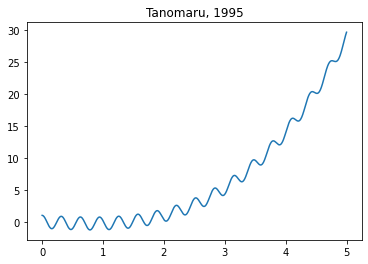

In [5]:
x = np.linspace(0,5,1000)
y = np.cos(20*x)-np.abs(x)/2+(x**3)/4

plt.plot(x,y)
plt.title('Tanomaru, 1995')

In [6]:
# Separação dos dados  de treino e de teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y,test_size=0.30, random_state=55) #x = entradas, y= saídas desejadas, 0.3= 30% dados teste, 42 = pegar os msm numeros
print (len(x_treino))#tamanho dos dados de entrada de treino
print (len(y_treino))#tamanho dos dados de saída de treino
print (len(x_teste))
print (len(y_teste))

700
700
300
300


In [7]:
#criar a rede neural (arquitetura)
model = keras.Sequential() #define a forma com a qual os dados sao enviados pelos nos da rede
model.add(keras.layers.Dense(units=1, activation= 'linear', input_shape = [1]))#input no nó
model.add(keras.layers.Dense(units=64, activation= 'relu'))#neuronios oculto
model.add(keras.layers.Dense(units=128, activation= 'relu'))#neuronios oculto
model.add(keras.layers.Dense(units=256, activation= 'relu'))#neuronios oculto
model.add(keras.layers.Dense(units=128, activation= 'relu'))#neuronios oculto
model.add(keras.layers.Dense(units=64, activation= 'relu'))#neuronios oculto
model.add(keras.layers.Dense(units=1, activation= 'linear'))#neuronio de saída
model.compile(Adam(0.001), loss = 'mse', metrics=['accuracy'])#calculadores de exatidão e precisão
#loss é a função que avalia o erro
#msr erro quadratico medio
#metrics julga a performance da rede
#accuracy avalia se o estimulo esta próximo do real
#Adam otimizador com peso de 0.001 (quanto menos melhor, só que mais pesado e pode levar a "autismo" do algoritmo)

#Dados da rede
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 6

In [8]:
# realizar o treinamento da rede
historico = model.fit(x_treino, y_treino, epochs=2000, verbose=0) #entradas, saidas desejadas, numero de iterações, mostrar tela de treino

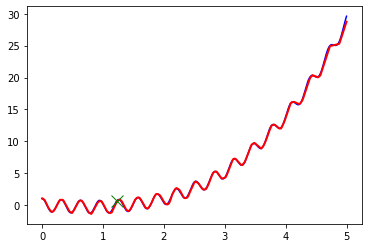

In [9]:
#cmputar a saida
y_predito = model.predict(x) #avalia  a rede para todos os valores de x
y2=model.predict([1.234567])#avalia a rede para x = 1.23456789 (arbitrario)

#mostrar os resultados
plt.plot(x,y,'b') #plotar o gráfico orginal em azul
plt.plot(x,y_predito,'r', linewidth =2) #plotar o gráfico treinado em vermelho
plt.plot(1.234567,y2,'xg', markersize = 12) #X verde no gráfico para avaliar a interpolação de forma visual  

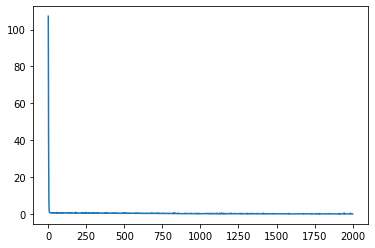

In [10]:
Loss = historico.history['loss']
epocas = range(1, len(Loss)+1)
plt.plot(epocas,Loss, label = 'Erro no treinamento')#calcula o erro dos valores aprendido com o desejado através das épocas

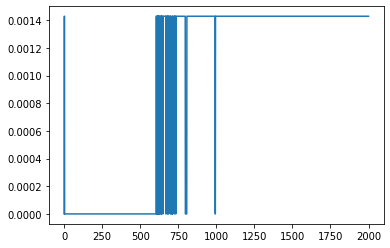

In [11]:
acc= historico.history['accuracy']
epocas = range(1,len(Loss)+1)
plt.plot(epocas, acc, label='Acurácia do Treinamento')#calcula a acurácia do treinamento através das épocas

In [12]:
# realizar o treinamento da rede
historico = model.fit(x_treino, y_treino, epochs=1000, verbose=0) #entradas, saidas desejadas, numero de iterações, mostrar tela de treino

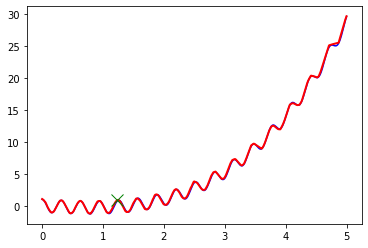

In [13]:
#cmputar a saida
y_predito = model.predict(x) #avalia  a rede para todos os valores de x
y2=model.predict([1.234567])#avalia a rede para x = 1.23456789 (arbitrario)

#mostrar os resultados
plt.plot(x,y,'b') #plotar o gráfico orginal em azul
plt.plot(x,y_predito,'r', linewidth =2) #plotar o gráfico treinado em vermelho
plt.plot(1.234567,y2,'xg', markersize = 12) #X verde no gráfico para avaliar a interpolação de forma visual  

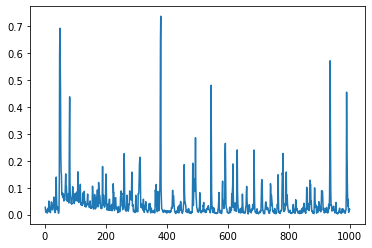

In [14]:
Loss = historico.history['loss']
epocas = range(1, len(Loss)+1)
plt.plot(epocas,Loss, label = 'Erro no treinamento')#calcula o erro dos valores aprendido com o desejado através das épocas

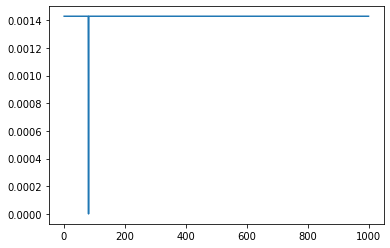

In [15]:
acc= historico.history['accuracy']
epocas = range(1,len(Loss)+1)
plt.plot(epocas, acc, label='Acurácia do Treinamento')#calcula a acurácia do treinamento através das épocas